https://thecleverprogrammer.com/2024/07/01/stock-market-portfolio-optimization-with-python/

In [208]:
import pandas as pd

from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
end_date = date.today().strftime('%D/%M/%Y')
start_date = (date.today()-timedelta(days=365)).strftime('%y/%m/%d')

In [210]:
end_date
start_date

'23/12/14'

In [211]:
data = pd.read_csv("D:\WORK\datascience\practice\Stock-Market-Portfolio-Optimization\stock_data.csv")
data

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0
...,...,...,...,...,...,...,...,...
967,2024-06-27,TCS.NS,3934.149902,3934.149902,3942.000000,3818.100098,3831.000000,4526556.0
968,2024-06-28,HDFCBANK.NS,1683.800049,1683.800049,1706.599976,1679.000000,1697.599976,13238023.0
969,2024-06-28,INFY.NS,1566.750000,1566.750000,1588.500000,1564.250000,1572.550049,8197544.0
970,2024-06-28,RELIANCE.NS,3130.800049,3130.800049,3162.000000,3062.050049,3062.050049,14478668.0


In [212]:
stockdata = data.reindex()
stockdata

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0
...,...,...,...,...,...,...,...,...
967,2024-06-27,TCS.NS,3934.149902,3934.149902,3942.000000,3818.100098,3831.000000,4526556.0
968,2024-06-28,HDFCBANK.NS,1683.800049,1683.800049,1706.599976,1679.000000,1697.599976,13238023.0
969,2024-06-28,INFY.NS,1566.750000,1566.750000,1588.500000,1564.250000,1572.550049,8197544.0
970,2024-06-28,RELIANCE.NS,3130.800049,3130.800049,3162.000000,3062.050049,3062.050049,14478668.0


pd.melt(
    frame,               # The DataFrame to melt
    id_vars=None,        # Columns to keep fixed (not melted)
    value_vars=None,     # Columns to melt (default: all columns except id_vars)
    var_name=None,       # Name of the new column that holds the melted column names
    value_name='value',  # Name of the new column that holds the values
    col_level=None       # Specify level in a MultiIndex column to melt

In [213]:
#datamelted = pd.melt(stockdata,id_vars=['Date'],var_name=['Variables'])
datamelted = data.melt(
    id_vars=['Date', 'Ticker'],  # Columns to keep as identifiers
    value_vars=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'],  # Columns to melt
    var_name='Attribute',  # New column name for melted variable names
    value_name='Value'  # New column name for values
)

datamelted

,Date,Ticker,Attribute,Value
0,2023-07-03,HDFCBANK.NS,Adj Close,1.696632e+03
1,2023-07-03,INFY.NS,Adj Close,1.309279e+03
2,2023-07-03,RELIANCE.NS,Adj Close,2.405792e+03
3,2023-07-03,TCS.NS,Adj Close,3.216993e+03
4,2023-07-04,HDFCBANK.NS,Adj Close,1.704919e+03
...,...,...,...,...
5827,2024-06-27,TCS.NS,Volume,4.526556e+06
5828,2024-06-28,HDFCBANK.NS,Volume,1.323802e+07
5829,2024-06-28,INFY.NS,Volume,8.197544e+06
5830,2024-06-28,RELIANCE.NS,Volume,1.447867e+07


In [214]:
pivottable = datamelted.pivot_table(index=['Date','Ticker'],columns=['Attribute'],values=['Value'],aggfunc='first')
pivottable

Value                                         \
Attribute                 Adj Close        Close         High          Low   
Date       Ticker                                                            
2023-07-03 HDFCBANK.NS  1696.631836  1719.800049  1757.500000  1710.000000   
           INFY.NS      1309.278564  1333.699951  1346.000000  1328.449951   
           RELIANCE.NS  2405.791992  2414.290283  2420.105225  2358.587158   
           TCS.NS       3216.993164  3272.300049  3318.800049  3268.750000   
2023-07-04 HDFCBANK.NS  1704.918579  1728.199951  1747.000000  1713.800049   
...                             ...          ...          ...          ...   
2024-06-27 TCS.NS       3934.149902  3934.149902  3942.000000  3818.100098   
2024-06-28 HDFCBANK.NS  1683.800049  1683.800049  1706.599976  1679.000000   
           INFY.NS      1566.750000  1566.750000  1588.500000  1564.250000   
           RELIANCE.NS  3130.800049  3130.800049  3162.000000  3062.050049   
           TCS.NS       3904.149902  3904.149902  3960.000000  3897.850098   

                                                 
Attribute                      Open      Volume  
Date       Ticker                                
2023-07-03 HDFCBANK.NS  1712.500000  22052058.0  
           INFY.NS      1330.000000   7732412.0  
           RELIANCE.NS  2361.079346   6077193.0  
           TCS.NS       3314.300049   1687264.0  
2023-07-04 HDFCBANK.NS  1723.449951  19397594.0  
...                             ...         ...  
2024-06-27 TCS.NS       3831.000000   4526556.0  
2024-06-28 HDFCBANK.NS  1697.599976  13238023.0  
           INFY.NS      1572.550049   8197544.0  
           RELIANCE.NS  3062.050049  14478668.0  
           TCS.NS       3917.800049   2731571.0  

[972 rows x 6 columns]

In [215]:
stock_data = pivottable.reset_index()
stock_data

Date       Ticker        Value                            \
Attribute                             Adj Close        Close         High   
0          2023-07-03  HDFCBANK.NS  1696.631836  1719.800049  1757.500000   
1          2023-07-03      INFY.NS  1309.278564  1333.699951  1346.000000   
2          2023-07-03  RELIANCE.NS  2405.791992  2414.290283  2420.105225   
3          2023-07-03       TCS.NS  3216.993164  3272.300049  3318.800049   
4          2023-07-04  HDFCBANK.NS  1704.918579  1728.199951  1747.000000   
..                ...          ...          ...          ...          ...   
967        2024-06-27       TCS.NS  3934.149902  3934.149902  3942.000000   
968        2024-06-28  HDFCBANK.NS  1683.800049  1683.800049  1706.599976   
969        2024-06-28      INFY.NS  1566.750000  1566.750000  1588.500000   
970        2024-06-28  RELIANCE.NS  3130.800049  3130.800049  3162.000000   
971        2024-06-28       TCS.NS  3904.149902  3904.149902  3960.000000   

                                                 
Attribute          Low         Open      Volume  
0          1710.000000  1712.500000  22052058.0  
1          1328.449951  1330.000000   7732412.0  
2          2358.587158  2361.079346   6077193.0  
3          3268.750000  3314.300049   1687264.0  
4          1713.800049  1723.449951  19397594.0  
..                 ...          ...         ...  
967        3818.100098  3831.000000   4526556.0  
968        1679.000000  1697.599976  13238023.0  
969        1564.250000  1572.550049   8197544.0  
970        3062.050049  3062.050049  14478668.0  
971        3897.850098  3917.800049   2731571.0  

[972 rows x 8 columns]

In [216]:
stockdata['Date'] = pd.to_datetime(stock_data['Date'])
stockdata.set_index('Date',inplace=True)
stockdata.reset_index(inplace=True)
stockdata

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0
...,...,...,...,...,...,...,...,...
967,2024-06-27,TCS.NS,3934.149902,3934.149902,3942.000000,3818.100098,3831.000000,4526556.0
968,2024-06-28,HDFCBANK.NS,1683.800049,1683.800049,1706.599976,1679.000000,1697.599976,13238023.0
969,2024-06-28,INFY.NS,1566.750000,1566.750000,1588.500000,1564.250000,1572.550049,8197544.0
970,2024-06-28,RELIANCE.NS,3130.800049,3130.800049,3162.000000,3062.050049,3062.050049,14478668.0


In [217]:
stockdata.columns

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

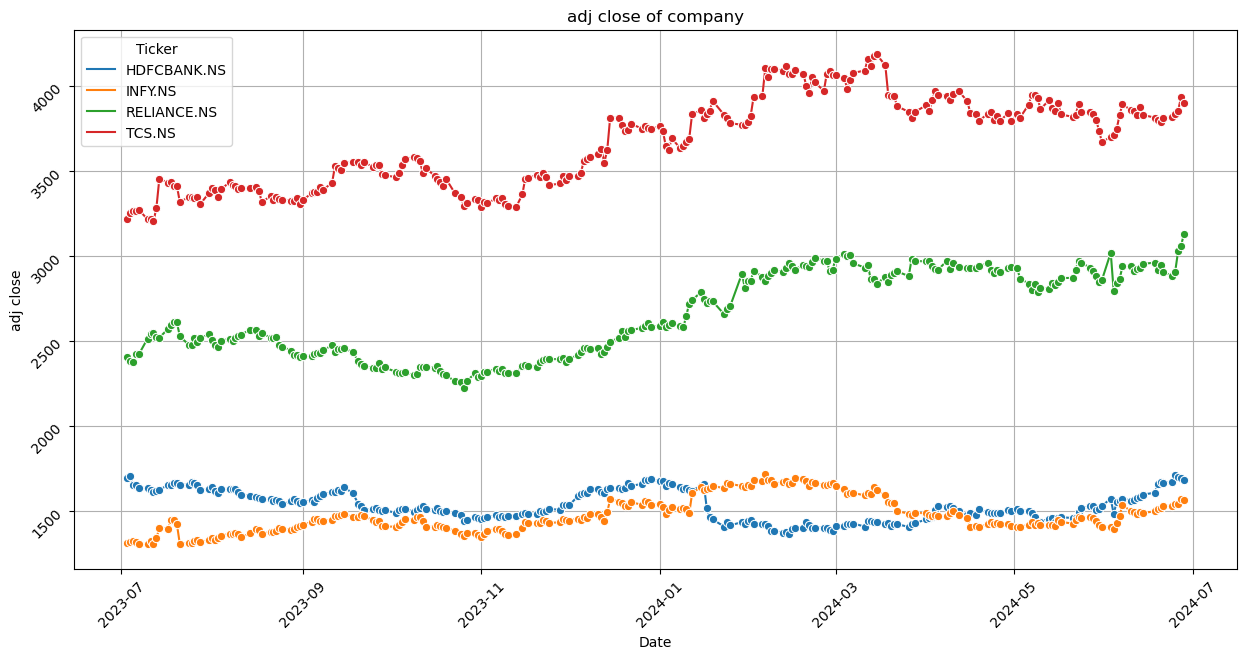

In [218]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=stockdata,x='Date',y='Adj Close',hue='Ticker', marker='o')
plt.title('adj close of company')
plt.xlabel('Date')
plt.ylabel('adj close')
plt.grid('True')
plt.xticks(rotation=45)

plt.yticks(rotation=45)
plt.show()



Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock

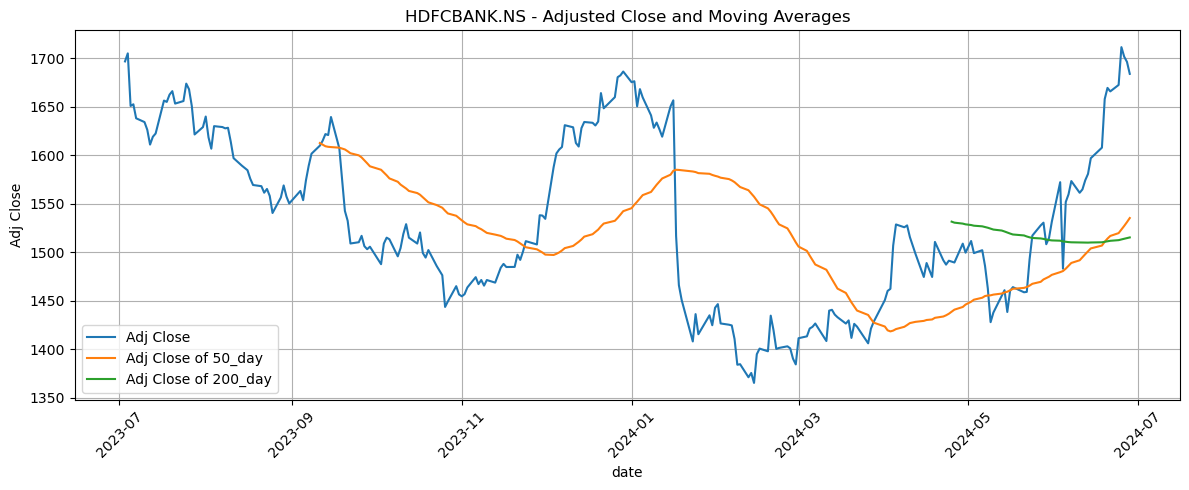

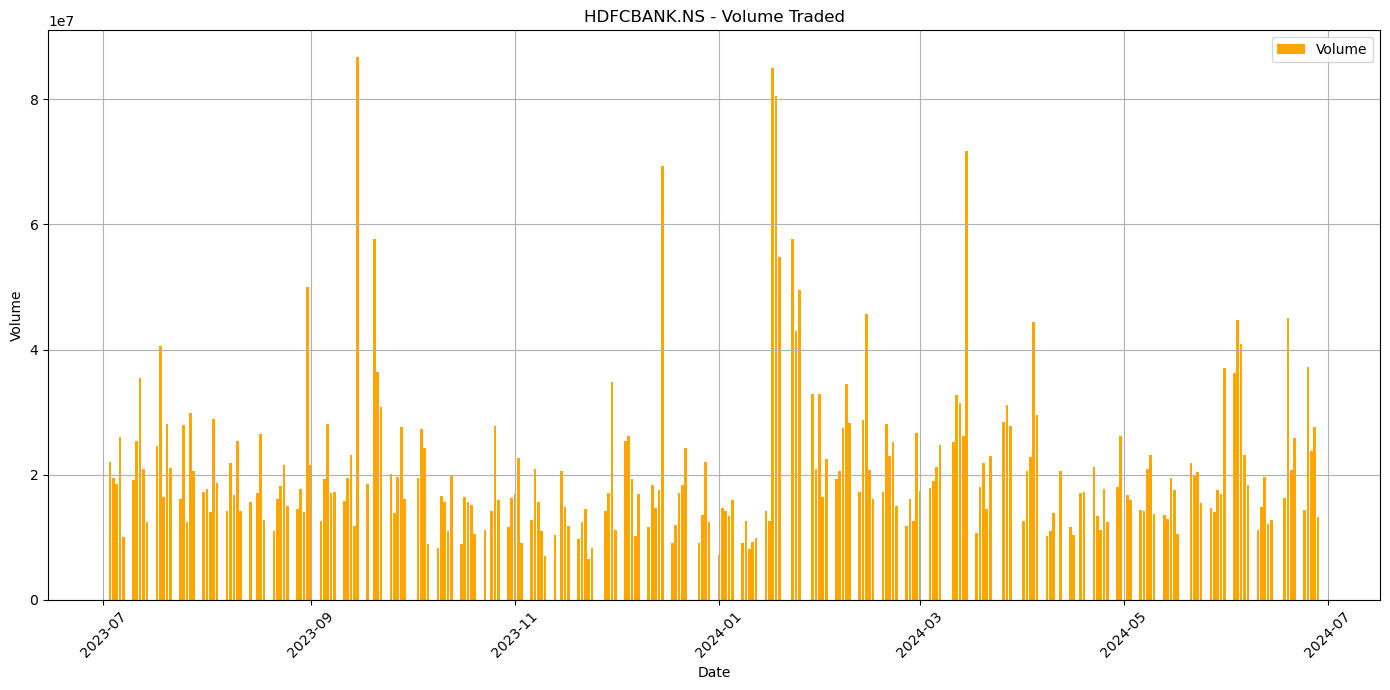

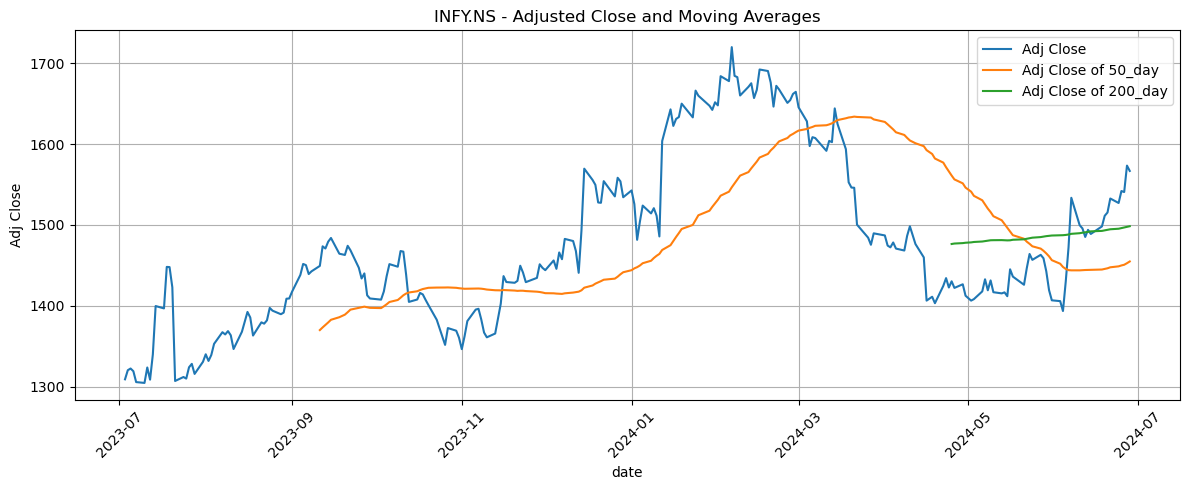

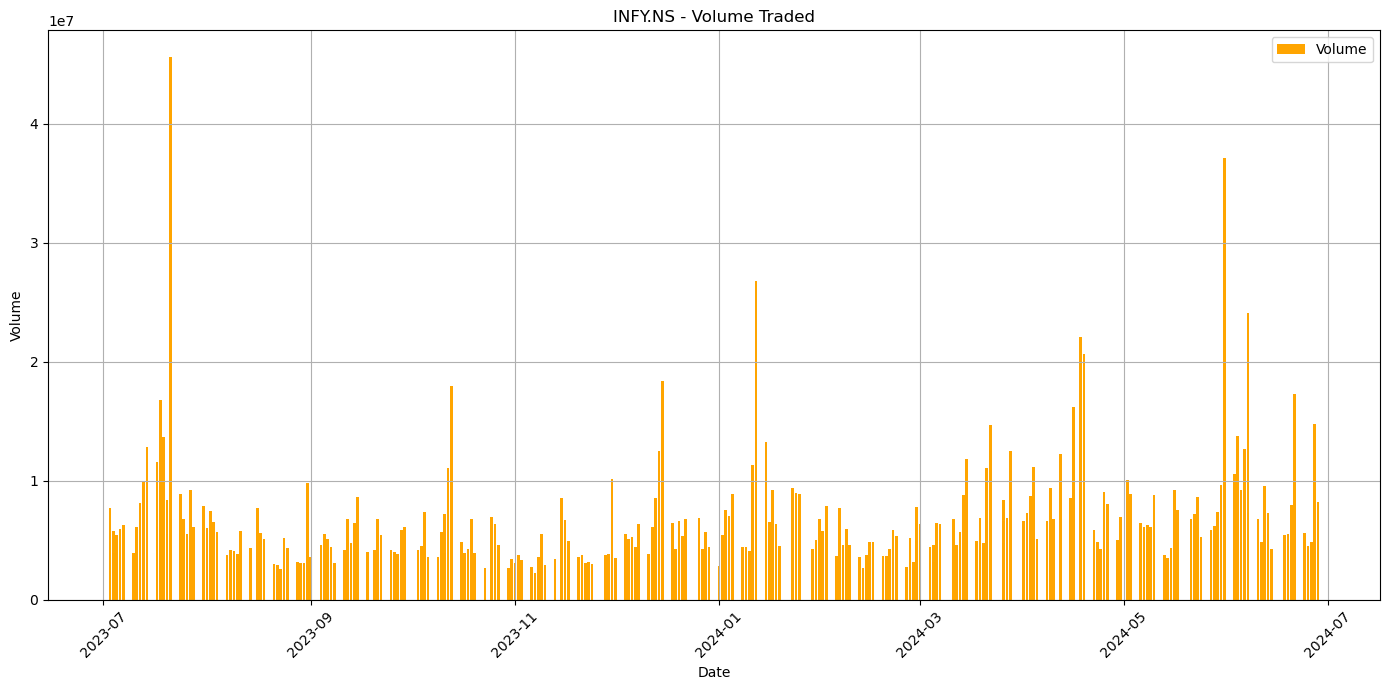

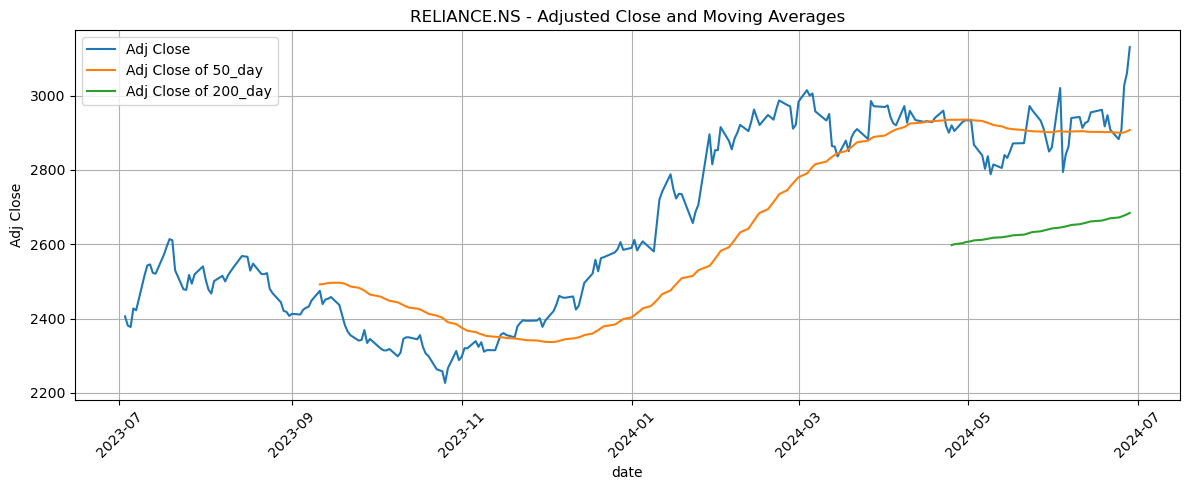

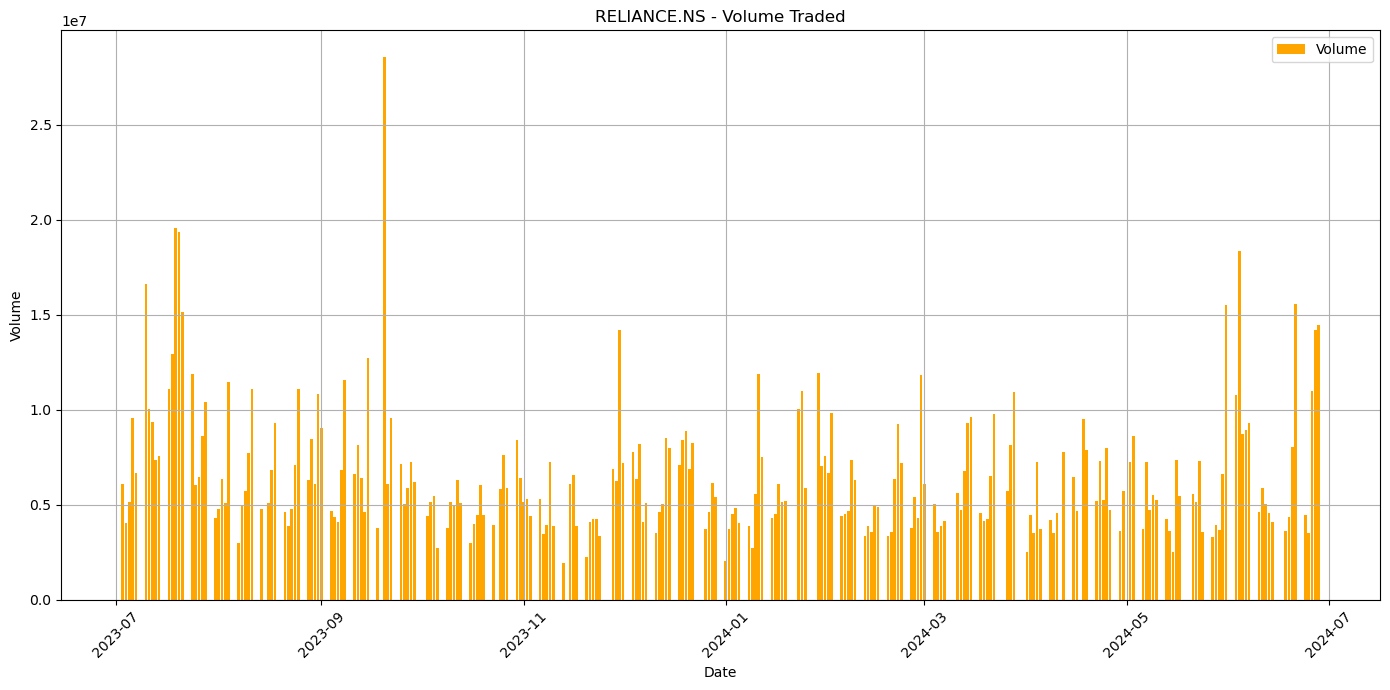

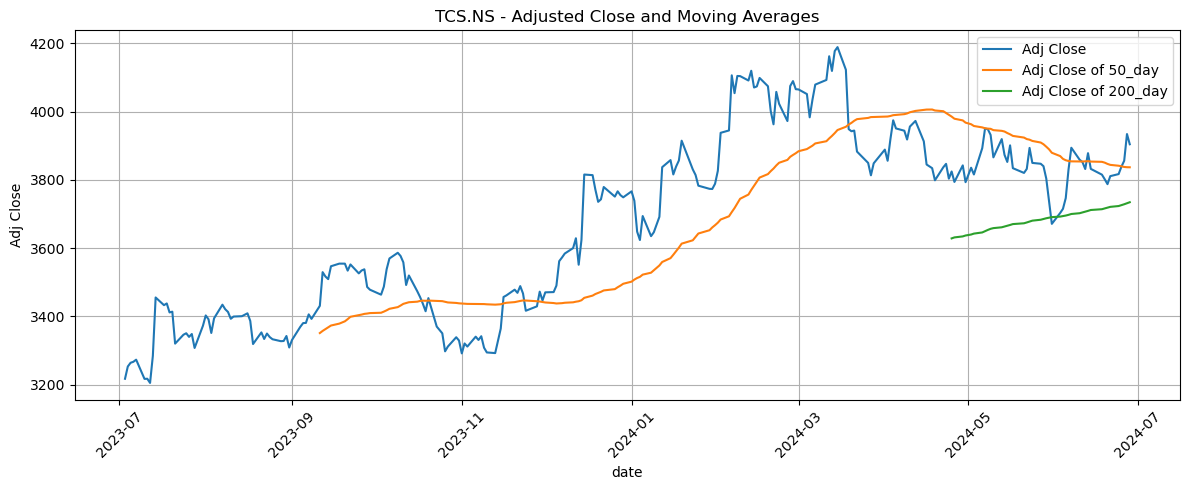

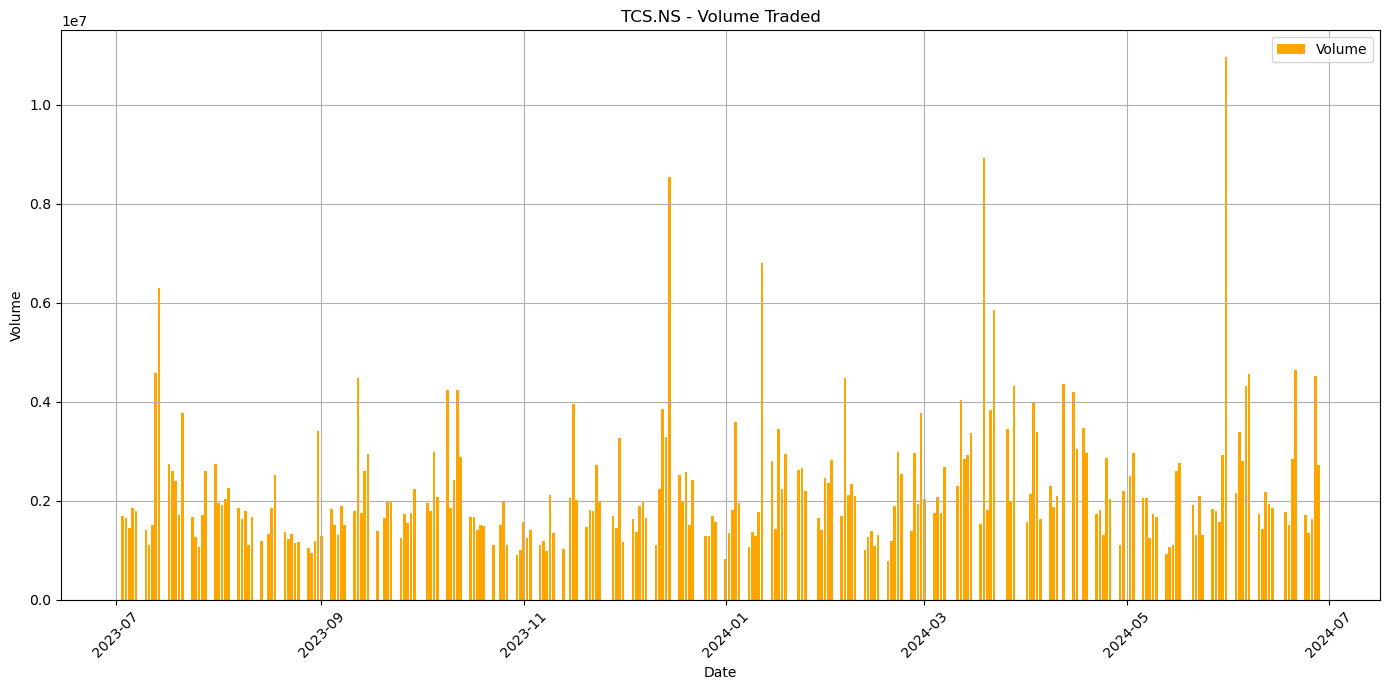

In [219]:
short_term = 50
large_term = 200

stockdata.set_index('Date',inplace=True)
unique_ticker = stockdata['Ticker'].unique()

for ticker in unique_ticker:
    ticker_data = stockdata[stockdata['Ticker'] == ticker].copy()
    ticker_data['50_day'] = ticker_data['Adj Close'].rolling(window=short_term).mean()
    ticker_data['200_day'] = ticker_data['Adj Close'].rolling(window=large_term).mean()
    
    #print(ticker_data)
    plt.figure(figsize=(12,5))
    plt.plot(ticker_data.index,ticker_data['Adj Close'],label='Adj Close')
    plt.plot(ticker_data.index,ticker_data['50_day'],label='Adj Close of 50_day')
    plt.plot(ticker_data.index,ticker_data['200_day'],label='Adj Close of 200_day')
    plt.xlabel('date')
    plt.ylabel('Adj Close')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

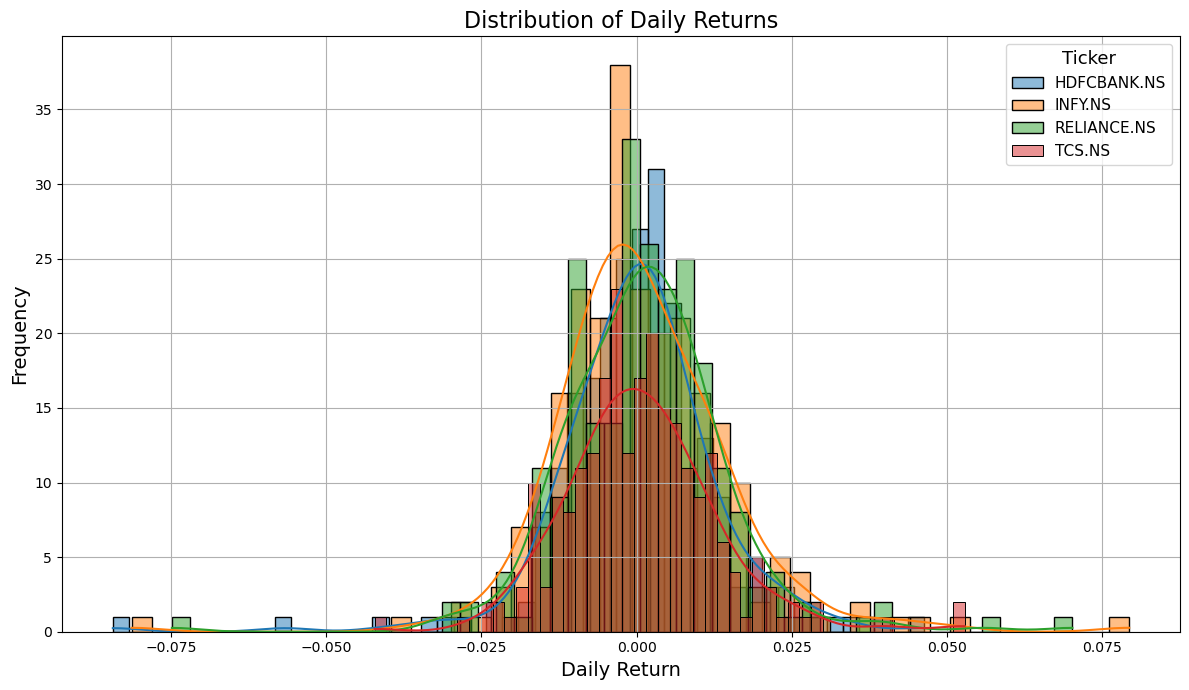

In [220]:
stockdata['daily_returns'] = stockdata.groupby('Ticker')['Adj Close'].pct_change()
plt.figure(figsize=(12,7))

for ticker in unique_ticker:
    ticker_data = stockdata[stockdata['Ticker'] == ticker]
    sns.histplot(ticker_data['daily_returns'].dropna(),bins=50,kde=True,label=ticker)
    
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()